In [1]:
from fastai.tabular import *

# Data

In [2]:
df = pd.read_pickle('./data/ligamx/WLT2')

In [3]:
df['L_ES_LOC'] = True
df['V_ES_LOC'] = False

df.at[0, 'L_ES_LOC'] = False
df.at[0, 'V_ES_LOC'] = True

In [4]:
testing_df = df.iloc[range(143, 161)].copy()
valid_df = df.iloc[range(125, 143)].copy()

In [14]:
len(df)

4883

In [5]:
df.drop(df.index[range(161, 174)], inplace = True)
df.reset_index(drop=True, inplace=True)

In [6]:
def fix_idx(cdf):
    cdf.reset_index(drop=True, inplace=True)

In [7]:
df.drop(df.index[range(125, 161)], inplace = True)
fix_idx(df)

In [8]:
df_og = df.copy()

In [9]:
# DF for training
df = pd.concat([df_og, valid_df])
fix_idx(df)

In [10]:
# DF for testing
df_t = pd.concat([df_og, valid_df, testing_df])
fix_idx(df_t)

In [61]:
def def_emb_sz_2(classes, n, sz_dict=None):
    "Pick an embedding size for `n` depending on `classes` if not given in `sz_dict`."
    print(classes[n])
    sz_dict = ifnone(sz_dict, {})
    n_cat = len(classes[n])
    sz = sz_dict.get(n, int(tabular.data.emb_sz_rule(n_cat)))  # rule of thumb
    return n_cat,sz

In [62]:
tabular.data.def_emb_sz = def_emb_sz_2

In [324]:
df2 = df
deep_vars = ['RES']
#categorical values
cat_names = ['LOC', 'L_ES_LOC', 'VIS', 'V_ES_LOC', 'JRD', 'ANO', 'TIPO',]
#continious variables
cont_names = ['L_JJ', 'L_POS', 'V_POS',
       'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ',
       'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_JJ', 'V_R_JG_JJ', 'V_R_JE_JJ',
       'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

data = (TabularList.from_df(df2, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_none()
   .label_from_df(cols=deep_vars)
   .databunch(bs=2))

data.get_emb_szs()

['#na#' 'america' 'atlante' 'atlas' 'atletico de san luis' 'chiapas' 'cruz azul' 'fc juarez' 'guadalajara' 'indios'
 'irapuato' 'leon' 'lobos buap' 'monterrey' 'morelia' 'necaxa' 'pachuca' 'puebla' 'queretaro' 'san luis' 'santos'
 'sinaloa' 'tigres' 'tijuana' 'toluca' 'u de g' 'uag' 'unam' 'veracruz']
['#na#' False True]
['#na#' 'america' 'atlante' 'atlas' 'atletico de san luis' 'chiapas' 'cruz azul' 'fc juarez' 'guadalajara' 'indios'
 'irapuato' 'leon' 'lobos buap' 'monterrey' 'morelia' 'necaxa' 'pachuca' 'puebla' 'queretaro' 'san luis' 'santos'
 'sinaloa' 'tigres' 'tijuana' 'toluca' 'u de g' 'uag' 'unam' 'veracruz']
['#na#' False True]
['#na#' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0'
 '18.0' '19.0' '20.0']
['#na#' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']
['#na#' 'apertura' 'clausura']


[(29, 11), (3, 3), (29, 11), (3, 3), (21, 9), (17, 8), (3, 3)]

In [325]:
data_lmx = df
data_separated = []
for i in range(2012, 2020):
    data_separated.append(pd.concat([data_lmx[data_lmx.ANO == i][data_lmx.TIPO == 'clausura'], data_lmx[data_lmx.ANO == i][data_lmx.TIPO == 'apertura']]))

sub_data = pd.concat([data_separated[6], data_separated[7]])
    
val_rng = range(155, 175)

for i, dataf in enumerate(data_separated):
    if i < 7: data_separated[i] = (pd.concat([dataf, data_lmx.iloc[val_rng]]))
    data_separated[i].reset_index(drop=True, inplace=True)
data_separated[0].tail()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
329,morelia,leon,20.0,2019,apertura,7.0,18.0,0.444444,0.166667,0.388889,...,0.500000,0.333333,0.166667,2.111111,1.277778,0.833333,1.833333,1,True,False
330,necaxa,queretaro,20.0,2019,apertura,5.0,18.0,0.500000,0.222222,0.277778,...,0.500000,0.222222,0.277778,1.722222,1.055556,0.666667,1.722222,2,True,False
331,monterrey,santos,20.0,2019,apertura,8.0,18.0,0.444444,0.166667,0.388889,...,0.611111,0.222222,0.166667,2.222222,1.388889,0.833333,2.055556,2,True,False
332,america,tigres,20.0,2019,apertura,6.0,18.0,0.444444,0.388889,0.166667,...,0.444444,0.444444,0.111111,1.444444,0.777778,0.666667,1.777778,0,True,False
333,morelia,toluca,1.0,2019,clausura,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,True,False


# Regular

In [23]:
df_t.tail(50)

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
4851,atlas,guadalajara,18.0,2004,clausura,7.0,17.0,0.294118,0.470588,0.235294,...,0.470588,0.235294,0.294118,1.411765,1.235294,0.176471,1.647059,1,True,False
4852,pachuca,irapuato,18.0,2004,clausura,6.0,17.0,0.352941,0.411765,0.235294,...,0.294118,0.411765,0.294118,1.117647,1.588235,-0.470588,1.294118,1,True,False
4853,uag,unam,18.0,2004,clausura,18.0,17.0,0.294118,0.117647,0.588235,...,0.588235,0.294118,0.117647,2.117647,0.941176,1.176471,2.058824,0,True,False
4854,america,necaxa,18.0,2004,clausura,4.0,17.0,0.411765,0.294118,0.294118,...,0.294118,0.352941,0.352941,1.176471,1.294118,-0.117647,1.235294,2,True,False
4855,toluca,santos,19.0,2004,clausura,5.0,18.0,0.388889,0.333333,0.277778,...,0.333333,0.166667,0.500000,1.666667,1.444444,0.222222,1.166667,2,True,False
4856,tigres,atlante,19.0,2004,clausura,9.0,18.0,0.333333,0.277778,0.388889,...,0.333333,0.333333,0.333333,1.500000,1.444444,0.055556,1.333333,0,True,False
4857,unam,monterrey,19.0,2004,clausura,2.0,18.0,0.611111,0.277778,0.111111,...,0.111111,0.666667,0.222222,1.444444,1.500000,-0.055556,1.000000,2,True,False
4858,puebla,america,19.0,2004,clausura,15.0,18.0,0.277778,0.277778,0.444444,...,0.444444,0.277778,0.277778,1.722222,1.444444,0.277778,1.611111,0,True,False
4859,cruz azul,uag,19.0,2004,clausura,12.0,18.0,0.333333,0.222222,0.444444,...,0.277778,0.111111,0.611111,1.666667,2.111111,-0.444444,0.944444,1,True,False
4860,morelia,pachuca,19.0,2004,clausura,16.0,18.0,0.277778,0.277778,0.444444,...,0.333333,0.444444,0.222222,1.722222,1.611111,0.111111,1.444444,2,True,False


In [1]:
deep_vars = ['RES']
#categorical values
cat_names = ['LOC', 'VIS', 'JRD', 'ANO', 'TIPO']
#continious variables
cont_names = ['L_JJ', 'L_POS', 'V_POS',
       'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ',
       'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_JJ', 'V_R_JG_JJ', 'V_R_JE_JJ',
       'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(len(df)-18, len(df)))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))

learn = tabular_learner(data, layers=[500, 200, 100],  ps=[0.1, 0.1, 0.1], emb_drop=0.1, metrics=accuracy)

NameError: name 'Categorify' is not defined

In [57]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (4865 items)
x: TabularList
LOC puebla; VIS tijuana; JRD 1.0; ANO 2019; TIPO apertura; L_JJ -1.6216; L_POS -1.6440; V_POS -1.5672; L_R_JG_JJ -1.4181; L_R_JE_JJ -1.2420; L_R_JP_JJ -1.4345; L_R_GF_JJ -1.9524; L_R_GC_JJ -1.9671; L_R_DIF_JJ 0.0493; L_R_PTS_JJ -1.8627; V_JJ -1.6215; V_R_JG_JJ -1.4556; V_R_JE_JJ -1.2469; V_R_JP_JJ -1.3898; V_R_GF_JJ -1.9557; V_R_GC_JJ -2.0158; V_R_DIF_JJ -0.0662; V_R_PTS_JJ -1.9094; ,LOC atlas; VIS fc juarez; JRD 1.0; ANO 2019; TIPO apertura; L_JJ -1.6216; L_POS -1.6440; V_POS -1.5672; L_R_JG_JJ -1.4181; L_R_JE_JJ -1.2420; L_R_JP_JJ -1.4345; L_R_GF_JJ -1.9524; L_R_GC_JJ -1.9671; L_R_DIF_JJ 0.0493; L_R_PTS_JJ -1.8627; V_JJ -1.6215; V_R_JG_JJ -1.4556; V_R_JE_JJ -1.2469; V_R_JP_JJ -1.3898; V_R_GF_JJ -1.9557; V_R_GC_JJ -2.0158; V_R_DIF_JJ -0.0662; V_R_PTS_JJ -1.9094; ,LOC atletico de san luis; VIS unam; JRD 1.0; ANO 2019; TIPO apertura; L_JJ -1.6216; L_POS -1.6440; V_POS -1.5672; L_R_JG_JJ -1.4181; L_R_JE_JJ -1.24

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-03
Min loss divided by 10: 7.59E-04


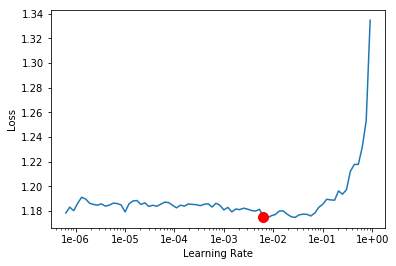

In [12]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(150, 1e-4, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.205447,1.200162,0.388889,00:01
1,1.183244,1.171362,0.333333,00:01
2,1.175302,1.149210,0.333333,00:01
3,1.158278,1.126303,0.333333,00:01
4,1.155258,1.124701,0.333333,00:01
5,1.146182,1.105333,0.333333,00:00
6,1.144554,1.092485,0.388889,00:00
7,1.130561,1.073685,0.500000,00:00
8,1.130301,1.064781,0.500000,00:01
9,1.127829,1.069113,0.444444,00:01


In [45]:
val_rng = range(len(df)-18, len(df))

x = 0
for i in val_rng:
    dta = df.iloc[i]
    pred = learn.predict(dta)
    pred = pred[2]
    preds = []
    for j in range(3):
        preds.append((pred[j].item(), j))
    preds.sort(reverse = True)
    #print(preds)
    if(preds[0][1] == dta.RES or preds[1][1] == dta.RES): x+=1
    
print(x, '/', len(val_rng))
x/len(val_rng)

15 / 18


0.8333333333333334

In [383]:
data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(list(range(len(sub_data)-20, len(sub_data))))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))

learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


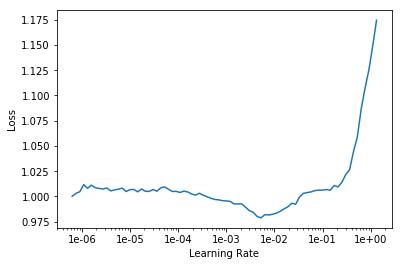

In [384]:
learn.lr_find()
learn.recorder.plot()

# Match Pred

## Model and learner

In [76]:
class MatchTabularModel(nn.Module):
    "Basic model for match tabular data."
    def __init__(self,
                 #Contestants parameters
                 emb_szs_cts:ListSizes=None, n_cont_cts:int=None, layers_cts:Collection[int]=None, ps_cts:Collection[float]=None, emb_drop_cts:float=0.,
                 #General Data parameters
                 emb_szs_grl:ListSizes=None, n_cont_grl:int=None, layers_grl:Collection[int]=None, ps_grl:Collection[float]=None, emb_drop_grl:float=0.,
                 #General Model parameters
                 use_bn:bool=True, bn_final:bool=False, out_sz:int=None, y_range:OptRange=None):
        super().__init__()
        
        """Simple Variable Setup -------------------------------------------------------------------------------------"""
        self.contestant_cat_n = len(emb_szs_cts)
        self.general_cat_n = len(emb_szs_grl)
        self.contestant_cont_n = n_cont_cts
        self.general_cont_n = n_cont_grl
        
        
        """Contestants Setup -------------------------------------------------------------------------------------"""
        # Dropout probabilities
        ps_cts = ifnone(ps_cts, [0]*len(layers_cts))
        ps_cts = listify(ps_cts, layers_cts)
        
        # Embeddings
        self.embeds_cts = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs_cts])
        self.emb_drop_cts = nn.Dropout(emb_drop_cts)
        n_emb_cts = sum(e.embedding_dim for e in self.embeds_cts)
        
        # Continious (non-embedding)
        self.bn_cont_cts = nn.BatchNorm1d(n_cont_cts)
        
        # Embeddings and Continious
        self.n_emb_cts, self.n_cont_cts = n_emb_cts, n_cont_cts
        sizes_cts = self.get_sizes(n_emb_cts, n_cont_cts, layers_cts)
        actns_cts = [nn.ReLU(inplace=True) for _ in range(len(sizes_cts)-1)]
        layers_cts = []
        for i,(n_in, n_out, dp, act) in enumerate(zip(sizes_cts[:-1], sizes_cts[1:], [0.]+ps_cts, actns_cts)):
            layers_cts += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
        self.layers_cts = nn.Sequential(*layers_cts)
        print(layers_cts)

        """General Setup -------------------------------------------------------------------------------------"""
        # Dropout Probabilities
        ps_grl = ifnone(ps_grl, [0]*len(layers_grl))
        ps_grl = listify(ps_grl, layers_grl)
        
        # Embeddings
        self.embeds_grl = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs_grl])
        self.emb_drop_grl = nn.Dropout(emb_drop_grl)
        n_emb_grl = sum(e.embedding_dim for e in self.embeds_grl)
        
        # Continious (non-embedding)
        n_cont_grl += sizes_cts[-1]*2 # adding output from contestants subnet to the size of the continious input
        self.bn_cont_grl = nn.BatchNorm1d(n_cont_grl)
        
        # Embeddings and Continitous
        self.n_emb_grl, self.n_cont_grl = n_emb_grl, n_cont_grl
        sizes_grl = self.get_sizes(n_emb_grl, n_cont_grl, layers_grl, out_sz)
        actns_grl = [nn.ReLU(inplace=True) for _ in range(len(sizes_grl)-2)] + [None]
        layers_grl = []
        for i,(n_in, n_out, dp, act) in enumerate(zip(sizes_grl[:-1], sizes_grl[1:], [0.]+ps_grl, actns_grl)):
            layers_grl += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
        
        if bn_final: layers_grl.append(nn.BatchNorm1d(sizes_grl[-1]))
        self.layers_grl = nn.Sequential(*layers_grl)
    

        """General Model Setup -------------------------------------------------------------------------------------"""
        self.y_range = y_range

    def get_sizes(self, n_emb, n_cont, layers, out_sz = None):
        res = [n_emb + n_cont] + layers
        return  res + [out_sz] if out_sz is not None else res

    def forward(self, x_cat:Tensor, x_cont:Tensor) -> Tensor:
        contestant_cat = self.contestant_cat_n
        general_cat = self.general_cat_n
        contestant_cont = self.contestant_cont_n
        general_cont = self.general_cont_n

        with torch.no_grad():
            cat_a = x_cat[:, :contestant_cat].clone()
            cat_b = x_cat[:, contestant_cat:contestant_cat*2].clone()
            cat_grl = x_cat[:, contestant_cat*2:].clone()
            
            cont_a = x_cont[:, :contestant_cont].clone()
            cont_b = x_cont[:, contestant_cont:contestant_cont*2].clone()
            cont_grl = x_cont[:, contestant_cont*2:].clone()
        
        # Forward of Contestant Layers:
        if self.n_emb_cts != 0:
            a = [e(cat_a[:,i]) for i,e in enumerate(self.embeds_cts)]
            b = [e(cat_b[:,i]) for i,e in enumerate(self.embeds_cts)]
            
            a = torch.cat(a, 1)
            b = torch.cat(b, 1)
            
            # Not very sure about this step, check here and in layers.
            # TODO: implement later: https://discuss.pytorch.org/t/how-to-fix-the-dropout-mask-for-different-batch/7119/3
            #a = self.emb_drop_cts(a)
            #b = self.emb_drop_cts(b)
        
        if self.n_cont_cts != 0:
            # not sure about this step, check here and in layers
            # TODO: check best practice for the batchnorm (use the same normalization for both or not)
            cont_a = self.bn_cont_cts(cont_a)
            cont_b = self.bn_cont_cts(cont_b)
            
            a = torch.cat([a, cont_a], 1) if self.n_emb_cts != 0 else cont_a
            b = torch.cat([b, cont_b], 1) if self.n_emb_cts != 0 else cont_b
            
        if self.n_emb_cts > 0 or self.n_cont_cts > 0:
            a = self.layers_cts(a)
            b = self.layers_cts(b)
            # SUM
            x = torch.cat([a, b], 1)
        
        if self.n_cont_grl != 0:
            x = torch.cat([x, cont_grl], 1) if self.n_emb_cts > 0 or self.n_cont_cts else cont_grl
            x = self.bn_cont_grl(x)
        if self.n_emb_grl != 0:
            x_cat = [e(cat_grl[:,i]) for i,e in enumerate(self.embeds_grl)]
            x_cat = torch.cat(x_cat, 1)
            x_cat = self.emb_drop_grl(x_cat)
            x = torch.cat([x, x_cat], 1)
            
        x = self.layers_grl(x)
        if self.y_range is not None:
            x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0]
        return x

In [77]:
def match_tabular_learner(
    #Contestants parameters
    layers_cts:Collection[int]=None, emb_szs_cts:Dict[str,int]=None, continious_len_cts:[int]=None, ps_cts:Collection[float]=None, emb_drop_cts:float=0.,
    
    #General parameters
    layers_grl:Collection[int]=None, emb_szs_grl:Dict[str,int]=None, continious_len_grl:[int]=None, ps_grl:Collection[float]=None, emb_drop_grl:float=0.,
    
    #General
    data:DataBunch=None, metrics=None, y_range:OptRange=None, use_bn:bool=True, **learn_kwargs):
    "Get a `Learner` using `data`, with `metrics`, including a `TabularModel` created using the remaining params."
    
    model = MatchTabularModel(
        #Contestants parameters
        emb_szs_cts, continious_len_cts, layers_cts, ps_cts, emb_drop_cts,
        
        #General parameters
        emb_szs_grl, continious_len_grl, layers_grl, ps_grl, emb_drop_grl,
        
        #General
        use_bn, out_sz = data.c, y_range=y_range)
    return Learner(data, model, metrics=metrics, **learn_kwargs)

## Use of Model

In [78]:
deep_vars = ['RES']
#categorical values
cat_names = ['LOC',
             'VIS',
             'JRD', 'ANO', 'TIPO']
#continious variables
cont_names = ['L_JJ', 'L_POS', 'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ', 'L_R_DIF_JJ', 'L_R_PTS_JJ',
              'V_JJ', 'V_POS', 'V_R_JG_JJ', 'V_R_JE_JJ', 'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

In [10]:
len(df)

4914

In [11]:
df.iloc[range(154, 174)]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
154,tijuana,monterrey,18.0,2019,apertura,8.0,16.0,0.437500,0.187500,0.375000,...,0.375000,0.187500,0.437500,1.312500,1.437500,-0.125000,1.312500,0,True,False
155,atletico de san luis,necaxa,18.0,2019,apertura,14.0,16.0,0.375000,0.125000,0.500000,...,0.500000,0.250000,0.250000,1.937500,1.250000,0.687500,1.750000,0,True,False
156,tigres,pachuca,18.0,2019,apertura,4.0,16.0,0.437500,0.437500,0.125000,...,0.375000,0.187500,0.437500,1.875000,1.625000,0.250000,1.312500,1,True,False
157,guadalajara,queretaro,18.0,2019,apertura,15.0,16.0,0.312500,0.250000,0.437500,...,0.500000,0.250000,0.250000,1.625000,0.937500,0.687500,1.750000,2,True,False
158,leon,toluca,18.0,2019,apertura,6.0,16.0,0.437500,0.375000,0.187500,...,0.250000,0.250000,0.500000,0.875000,1.250000,-0.375000,1.000000,2,True,False
159,unam,fc juarez,18.0,2019,apertura,9.0,16.0,0.375000,0.250000,0.375000,...,0.312500,0.125000,0.562500,0.937500,1.500000,-0.562500,1.062500,1,True,False
160,santos,cruz azul,18.0,2019,apertura,1.0,16.0,0.625000,0.187500,0.187500,...,0.250000,0.500000,0.250000,1.312500,1.250000,0.062500,1.250000,2,True,False
161,puebla,necaxa,19.0,2019,apertura,18.0,17.0,0.176471,0.294118,0.529412,...,0.529412,0.235294,0.235294,1.941176,1.176471,0.764706,1.823529,2,True,False
162,tijuana,leon,19.0,2019,apertura,9.0,17.0,0.411765,0.176471,0.411765,...,0.470588,0.352941,0.176471,2.117647,1.294118,0.823529,1.764706,0,True,False
163,queretaro,morelia,19.0,2019,apertura,6.0,17.0,0.470588,0.235294,0.294118,...,0.470588,0.176471,0.352941,1.764706,1.352941,0.411765,1.588235,2,True,False


In [81]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(len(df)-18, len(df)))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([], [], 0, None, 0.1,
                               [500, 200, 100], [(29, 12), (29, 12), (21, 9), (17, 8), (3, 3)], 18, [0.1, 0.1, 0.1], 0.1,
                               data, metrics=accuracy)

[]


In [60]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (4865 items)
x: TabularList
LOC puebla; VIS tijuana; JRD 1.0; ANO 2019; TIPO apertura; L_JJ -1.6216; L_POS -1.6440; L_R_JG_JJ -1.4181; L_R_JE_JJ -1.2420; L_R_JP_JJ -1.4345; L_R_GF_JJ -1.9524; L_R_GC_JJ -1.9671; L_R_DIF_JJ 0.0493; L_R_PTS_JJ -1.8627; V_JJ -1.6215; V_POS -1.5672; V_R_JG_JJ -1.4556; V_R_JE_JJ -1.2469; V_R_JP_JJ -1.3898; V_R_GF_JJ -1.9557; V_R_GC_JJ -2.0158; V_R_DIF_JJ -0.0662; V_R_PTS_JJ -1.9094; ,LOC atlas; VIS fc juarez; JRD 1.0; ANO 2019; TIPO apertura; L_JJ -1.6216; L_POS -1.6440; L_R_JG_JJ -1.4181; L_R_JE_JJ -1.2420; L_R_JP_JJ -1.4345; L_R_GF_JJ -1.9524; L_R_GC_JJ -1.9671; L_R_DIF_JJ 0.0493; L_R_PTS_JJ -1.8627; V_JJ -1.6215; V_POS -1.5672; V_R_JG_JJ -1.4556; V_R_JE_JJ -1.2469; V_R_JP_JJ -1.3898; V_R_GF_JJ -1.9557; V_R_GC_JJ -2.0158; V_R_DIF_JJ -0.0662; V_R_PTS_JJ -1.9094; ,LOC atletico de san luis; VIS unam; JRD 1.0; ANO 2019; TIPO apertura; L_JJ -1.6216; L_POS -1.6440; L_R_JG_JJ -1.4181; L_R_JE_JJ -1.2420; L_R_JP_JJ -

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


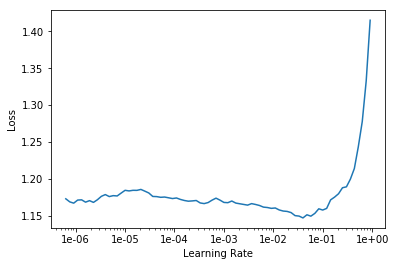

In [82]:
learn.lr_find()
learn.recorder.plot()

In [83]:
opt = learn.fit_one_cycle(150, 1e-4, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.163641,1.098616,0.388889,00:02
1,1.159575,1.064446,0.388889,00:02
2,1.149702,1.058401,0.444444,00:02
3,1.140259,1.019981,0.500000,00:02
4,1.135121,1.025524,0.500000,00:02
5,1.128883,1.011414,0.444444,00:01
6,1.125765,1.017083,0.500000,00:01
7,1.123519,0.992981,0.444444,00:02
8,1.123145,0.999068,0.500000,00:02
9,1.121389,0.993685,0.444444,00:02


In [211]:
learn.fit_one_cycle??

In [619]:
# learn.save('o2')
# learn.load('o2')

Learner(data=TabularDataBunch;

Train: LabelList (625 items)
x: TabularList
LOC puebla; L_ES_LOC True; VIS tigres; V_ES_LOC False; JRD 1.0; ANO 2018; TIPO clausura; L_JJ -1.6317; L_POS -1.6339; L_R_JG_JJ -1.4653; L_R_JE_JJ -1.2474; L_R_JP_JJ -1.4470; L_R_GF_JJ -1.8239; L_R_GC_JJ -1.8573; L_R_DIF_JJ 0.0385; L_R_PTS_JJ -1.7780; V_JJ -1.6308; V_POS -1.5798; V_R_JG_JJ -1.4912; V_R_JE_JJ -1.2209; V_R_JP_JJ -1.4177; V_R_GF_JJ -1.8687; V_R_GC_JJ -1.9363; V_R_DIF_JJ -0.0508; V_R_PTS_JJ -1.8133; ,LOC atlas; L_ES_LOC True; VIS leon; V_ES_LOC False; JRD 1.0; ANO 2018; TIPO clausura; L_JJ -1.6317; L_POS -1.6339; L_R_JG_JJ -1.4653; L_R_JE_JJ -1.2474; L_R_JP_JJ -1.4470; L_R_GF_JJ -1.8239; L_R_GC_JJ -1.8573; L_R_DIF_JJ 0.0385; L_R_PTS_JJ -1.7780; V_JJ -1.6308; V_POS -1.5798; V_R_JG_JJ -1.4912; V_R_JE_JJ -1.2209; V_R_JP_JJ -1.4177; V_R_GF_JJ -1.8687; V_R_GC_JJ -1.9363; V_R_DIF_JJ -0.0508; V_R_PTS_JJ -1.8133; ,LOC cruz azul; L_ES_LOC True; VIS tijuana; V_ES_LOC False; JRD 1.0; ANO 2018; TIPO clausura; 

In [418]:
learn.fit_one_cycle(10, 6e-7, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.022892,0.978068,0.500000,00:02
1,1.022485,0.984422,0.550000,00:02
2,1.025847,0.975583,0.550000,00:02
3,1.026305,0.975862,0.550000,00:02
4,1.024256,0.984274,0.500000,00:03
5,1.024543,0.978758,0.450000,00:03
6,1.028766,0.974119,0.500000,00:02
7,1.023256,0.979933,0.450000,00:02
8,1.027248,0.972628,0.550000,00:02
9,1.025644,0.972362,0.500000,00:02


In [620]:
#sub_data = pd.concat([data_separated[6], data_separated[7]])

val_rng = range(len(sub_data)-20, len(sub_data))

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(val_rng)
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn.data = data

In [140]:
val_rng = range(152, 167)
df.iloc[val_rng]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
152,morelia,puebla,18.0,2019,apertura,7.0,16.0,0.4375,0.1875,0.3750,...,0.187500,0.312500,0.500000,0.937500,1.750000,-0.812500,0.875000,2,True,False
153,veracruz,america,18.0,2019,apertura,19.0,16.0,0.0625,0.3125,0.6250,...,0.411765,0.411765,0.176471,1.588235,1.294118,0.294118,1.647059,0,True,False
154,tijuana,monterrey,18.0,2019,apertura,8.0,16.0,0.4375,0.1875,0.3750,...,0.375000,0.187500,0.437500,1.312500,1.437500,-0.125000,1.312500,0,True,False
155,atletico de san luis,necaxa,18.0,2019,apertura,14.0,16.0,0.3750,0.1250,0.5000,...,0.500000,0.250000,0.250000,1.937500,1.250000,0.687500,1.750000,0,True,False
156,tigres,pachuca,18.0,2019,apertura,4.0,16.0,0.4375,0.4375,0.1250,...,0.375000,0.187500,0.437500,1.875000,1.625000,0.250000,1.312500,1,True,False
157,guadalajara,queretaro,18.0,2019,apertura,15.0,16.0,0.3125,0.2500,0.4375,...,0.500000,0.250000,0.250000,1.625000,0.937500,0.687500,1.750000,2,True,False
158,leon,toluca,18.0,2019,apertura,6.0,16.0,0.4375,0.3750,0.1875,...,0.250000,0.250000,0.500000,0.875000,1.250000,-0.375000,1.000000,2,True,False
159,unam,fc juarez,18.0,2019,apertura,9.0,16.0,0.3750,0.2500,0.3750,...,0.312500,0.125000,0.562500,0.937500,1.500000,-0.562500,1.062500,1,True,False
160,santos,cruz azul,18.0,2019,apertura,1.0,16.0,0.6250,0.1875,0.1875,...,0.250000,0.500000,0.250000,1.312500,1.250000,0.062500,1.250000,2,True,False
161,morelia,toluca,1.0,2019,clausura,0.0,0.0,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,True,False


In [360]:
df.iloc[range(154, 174)]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
154,tijuana,monterrey,18.0,2019,apertura,8.0,16.0,0.437500,0.187500,0.375000,...,0.375000,0.187500,0.437500,1.312500,1.437500,-0.125000,1.312500,0,True,False
155,atletico de san luis,necaxa,18.0,2019,apertura,14.0,16.0,0.375000,0.125000,0.500000,...,0.500000,0.250000,0.250000,1.937500,1.250000,0.687500,1.750000,0,True,False
156,tigres,pachuca,18.0,2019,apertura,4.0,16.0,0.437500,0.437500,0.125000,...,0.375000,0.187500,0.437500,1.875000,1.625000,0.250000,1.312500,1,True,False
157,guadalajara,queretaro,18.0,2019,apertura,15.0,16.0,0.312500,0.250000,0.437500,...,0.500000,0.250000,0.250000,1.625000,0.937500,0.687500,1.750000,2,True,False
158,leon,toluca,18.0,2019,apertura,6.0,16.0,0.437500,0.375000,0.187500,...,0.250000,0.250000,0.500000,0.875000,1.250000,-0.375000,1.000000,2,True,False
159,unam,fc juarez,18.0,2019,apertura,9.0,16.0,0.375000,0.250000,0.375000,...,0.312500,0.125000,0.562500,0.937500,1.500000,-0.562500,1.062500,1,True,False
160,santos,cruz azul,18.0,2019,apertura,1.0,16.0,0.625000,0.187500,0.187500,...,0.250000,0.500000,0.250000,1.312500,1.250000,0.062500,1.250000,2,True,False
161,puebla,necaxa,19.0,2019,apertura,18.0,17.0,0.176471,0.294118,0.529412,...,0.529412,0.235294,0.235294,1.941176,1.176471,0.764706,1.823529,2,True,False
162,tijuana,leon,19.0,2019,apertura,9.0,17.0,0.411765,0.176471,0.411765,...,0.470588,0.352941,0.176471,2.117647,1.294118,0.823529,1.764706,0,True,False
163,queretaro,morelia,19.0,2019,apertura,6.0,17.0,0.470588,0.235294,0.294118,...,0.470588,0.176471,0.352941,1.764706,1.352941,0.411765,1.588235,2,True,False


In [342]:
sub_data.reset_index(drop=True, inplace=True)
sub_data.tail()

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
640,fc juarez,tigres,19.0,2019,apertura,16.0,17.0,0.294118,0.176471,0.529412,...,0.411765,0.470588,0.117647,1.411765,0.764706,0.647059,1.705882,0,True,False
641,morelia,leon,20.0,2019,apertura,7.0,18.0,0.444444,0.166667,0.388889,...,0.500000,0.333333,0.166667,2.111111,1.277778,0.833333,1.833333,1,True,False
642,necaxa,queretaro,20.0,2019,apertura,5.0,18.0,0.500000,0.222222,0.277778,...,0.500000,0.222222,0.277778,1.722222,1.055556,0.666667,1.722222,2,True,False
643,monterrey,santos,20.0,2019,apertura,8.0,18.0,0.444444,0.166667,0.388889,...,0.611111,0.222222,0.166667,2.222222,1.388889,0.833333,2.055556,2,True,False
644,america,tigres,20.0,2019,apertura,6.0,18.0,0.444444,0.388889,0.166667,...,0.444444,0.444444,0.111111,1.444444,0.777778,0.666667,1.777778,0,True,False


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


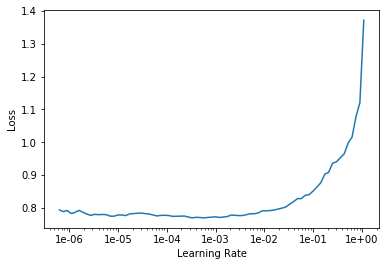

In [617]:
learn.lr_find()
learn.recorder.plot()

In [103]:
learn.fit(10, 1e-20, wd=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,0.767008,1.391747,0.150000,00:01
1,0.766939,1.368171,0.150000,00:01
2,0.764612,1.405140,0.150000,00:01
3,0.759763,1.380623,0.150000,00:01
4,0.769227,1.398781,0.150000,00:01
5,0.763106,1.372508,0.200000,00:01
6,0.782296,1.380539,0.150000,00:01


KeyboardInterrupt: 

In [183]:
# learn.save('MatchPred1')

In [218]:
len(df)

2530

In [219]:
len(data_lmx)

2530

In [243]:
val_rng = range(152, 161)

x = 0
for i in val_rng:
    dta = df.iloc[i]
    pred = learn.predict(dta)
    pred = pred[2]
    preds = []
    for j in range(3):
        preds.append((pred[j].item(), j))
    preds.sort(reverse = True)
    #print(preds)
    if(preds[0][1] == dta.RES or preds[1][1] == dta.RES): x+=1
    
print(x, '/', len(val_rng))
x/len(val_rng)

7 / 9


0.7777777777777778

In [625]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(154, 174))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn.data = data

In [626]:
learn.fit_one_cycle(10, 1e-1000, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.877922,0.839984,0.650000,00:01
1,0.877744,0.848545,0.600000,00:01
2,0.875265,0.863925,0.600000,00:01
3,0.869510,0.840905,0.600000,00:01
4,0.876256,0.858135,0.550000,00:01
5,0.868649,0.854343,0.550000,00:01
6,0.870725,0.859575,0.500000,00:01
7,0.878482,0.841997,0.600000,00:01
8,0.879510,0.853895,0.600000,00:01
9,0.873233,0.832671,0.600000,00:01


## Iterative training

In [280]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_none()
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))

learn = match_tabular_learner([200, 100, 50], [(27, 50), (3, 5)], 9, None, 0.,
                               [100, 50], [(21, 9), (9, 5), (3, 3)], 0, None, 0.,
                               data, metrics=accuracy)

for dta in data_separated:
    data = (TabularList.from_df(dta, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(len(dta)-20, len(dta)))
   .label_from_df(cols=deep_vars)
   .databunch(bs=45))
    learn.data = data
    learn.fit(7, 1e-3, wd=0.4)
    

[Linear(in_features=64, out_features=200, bias=True), ReLU(inplace=True), BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Linear(in_features=200, out_features=100, bias=True), ReLU(inplace=True), BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Linear(in_features=100, out_features=50, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.232739,1.118967,0.200000,00:00
1,1.161861,1.129730,0.200000,00:00
2,1.107733,1.088851,0.300000,00:00
3,1.065675,1.097664,0.350000,00:00
4,1.038342,1.103251,0.300000,00:00
5,1.010011,1.089025,0.350000,00:00
6,0.986701,1.183664,0.300000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.228914,1.086929,0.400000,00:00
1,1.156572,1.056376,0.350000,00:00
2,1.117169,1.082118,0.350000,00:00
3,1.086553,1.131179,0.500000,00:00
4,1.058115,1.141695,0.500000,00:00
5,1.027618,1.113531,0.550000,00:00
6,1.001191,1.082580,0.450000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.178806,1.148786,0.400000,00:00
1,1.127195,1.195832,0.300000,00:00
2,1.080823,1.205274,0.200000,00:00
3,1.040189,1.155877,0.250000,00:00
4,1.007586,1.116471,0.450000,00:00
5,0.972345,1.129211,0.400000,00:00
6,0.945318,1.132913,0.450000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.144611,1.148188,0.450000,00:00
1,1.086388,1.104582,0.350000,00:00
2,1.042840,1.048357,0.450000,00:00
3,0.999965,1.054406,0.450000,00:00
4,0.972951,1.055927,0.450000,00:00
5,0.944321,1.079078,0.500000,00:00
6,0.909411,1.055661,0.500000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.235176,1.117100,0.300000,00:00
1,1.168206,1.125393,0.450000,00:00
2,1.098857,1.103736,0.450000,00:00
3,1.057850,1.091192,0.400000,00:00
4,1.020374,1.118717,0.350000,00:00
5,0.985200,1.156155,0.350000,00:00
6,0.950016,1.171301,0.450000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.215363,1.253144,0.400000,00:00
1,1.152986,1.196993,0.250000,00:00
2,1.096035,1.122821,0.200000,00:00
3,1.059880,1.124079,0.250000,00:00
4,1.023587,1.147219,0.250000,00:00
5,0.991271,1.179513,0.250000,00:00
6,0.958710,1.155614,0.250000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.169723,1.279960,0.200000,00:00
1,1.120471,1.270474,0.250000,00:00
2,1.061637,1.132287,0.300000,00:00
3,1.015706,1.070161,0.400000,00:00
4,0.975821,1.088831,0.350000,00:00
5,0.949973,1.082190,0.300000,00:00
6,0.910763,1.028768,0.450000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.144854,1.155311,0.300000,00:00
1,1.076102,1.171370,0.200000,00:00
2,1.040655,1.114808,0.400000,00:00
3,0.998794,1.086006,0.250000,00:00
4,0.958123,1.053249,0.200000,00:00
5,0.921256,1.051692,0.450000,00:00
6,0.888243,1.065998,0.500000,00:00


## Several tryouts

In [118]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(134, 174))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([350, 150], [(29, 15), (3, 3)], 9, [0.3, 0.3], 0.3,
                               [100], [(21, 9), (17, 8), (3, 3)], 0, [0.3], 0.3,
                               data, metrics=accuracy)
learn.fit_one_cycle(200, 1e-4, wd=0.3)

[Linear(in_features=27, out_features=350, bias=True), ReLU(inplace=True), BatchNorm1d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.3, inplace=False), Linear(in_features=350, out_features=150, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.249571,1.238895,0.200000,00:01
1,1.224790,1.220429,0.225000,00:01
2,1.222193,1.210820,0.200000,00:01
3,1.220381,1.199099,0.200000,00:01
4,1.211692,1.190341,0.175000,00:01
5,1.195629,1.168325,0.200000,00:01
6,1.189551,1.181364,0.150000,00:01
7,1.185739,1.156689,0.175000,00:01
8,1.189606,1.176654,0.150000,00:01
9,1.181681,1.150265,0.150000,00:01


In [129]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(154, 174))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([200, 100], [(29, 15), (3, 3)], 9, [0.3, 0.3], 0.3,
                               [70], [(21, 9), (17, 8), (3, 3)], 0, [0.3], 0.3,
                               data, metrics=accuracy)
learn.fit_one_cycle(200, 1e-4, wd=0.3)

[Linear(in_features=27, out_features=200, bias=True), ReLU(inplace=True), BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.3, inplace=False), Linear(in_features=200, out_features=100, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.222883,1.048936,0.600000,00:01
1,1.214818,1.063743,0.500000,00:01
2,1.215625,1.066487,0.450000,00:01
3,1.216171,1.048570,0.550000,00:01
4,1.202955,1.055144,0.450000,00:01
5,1.199772,1.052099,0.500000,00:01
6,1.196798,1.062845,0.350000,00:01
7,1.192286,1.076380,0.400000,00:01
8,1.193218,1.043186,0.550000,00:01
9,1.185089,1.057118,0.400000,00:01


In [131]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(154, 174))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([500], [(29, 15), (3, 3)], 9, [0.2], 0.2,
                               [100], [(21, 9), (17, 8), (3, 3)], 0, [0.2], 0.2,
                               data, metrics=accuracy)
learn.fit_one_cycle(200, 1e-4, wd=0.3)

[Linear(in_features=27, out_features=500, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.197881,1.201321,0.200000,00:01
1,1.177056,1.168630,0.250000,00:00
2,1.159607,1.162902,0.250000,00:00
3,1.151371,1.143617,0.300000,00:01
4,1.151808,1.146797,0.300000,00:00
5,1.145852,1.142233,0.300000,00:00
6,1.147056,1.129604,0.300000,00:00
7,1.144996,1.121178,0.250000,00:00
8,1.143260,1.121986,0.250000,00:01
9,1.141404,1.120205,0.250000,00:01


KeyboardInterrupt: 

In [130]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(154, 174))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([550], [(29, 15), (3, 3)], 9, [0.2], 0.2,
                               [70], [(21, 9), (17, 8), (3, 3)], 0, [0.2], 0.2,
                               data, metrics=accuracy)
learn.fit_one_cycle(200, 1e-4, wd=0.3)

[Linear(in_features=27, out_features=550, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.218370,1.254435,0.250000,00:00
1,1.199403,1.241474,0.250000,00:00
2,1.182896,1.228327,0.250000,00:01
3,1.172370,1.205703,0.250000,00:01
4,1.162248,1.217535,0.300000,00:01
5,1.159648,1.203067,0.250000,00:01
6,1.157966,1.171500,0.200000,00:01
7,1.148157,1.167661,0.200000,00:01
8,1.142489,1.150512,0.200000,00:00
9,1.141578,1.145176,0.250000,00:01


In [122]:
data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(range(134, 174))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([300], [(29, 15), (3, 3)], 9, [0.2], 0.2,
                               [300], [(21, 9), (17, 8), (3, 3)], 0, [0.2], 0.2,
                               data, metrics=accuracy)
learn.fit_one_cycle(200, 1e-4, wd=0.3)

[Linear(in_features=27, out_features=300, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.201249,1.145183,0.175000,00:00
1,1.178240,1.153690,0.225000,00:00
2,1.160637,1.159964,0.275000,00:01
3,1.153221,1.158439,0.125000,00:01
4,1.148173,1.152574,0.275000,00:01
5,1.142685,1.151420,0.175000,00:01
6,1.135329,1.146360,0.200000,00:00
7,1.138557,1.138797,0.200000,00:00
8,1.129431,1.126376,0.325000,00:00
9,1.129086,1.116131,0.275000,00:00


## Trying regular

In [249]:
def tryRegular():
    deep_vars = ['RES']
    #categorical values
    cat_names = ['LOC', 'VIS', 'JRD', 'ANO', 'TIPO']
    #continious variables
    cont_names = ['L_JJ', 'L_POS', 'V_POS',
           'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ',
           'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_JJ', 'V_R_JG_JJ', 'V_R_JE_JJ',
           'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
    procs = [Categorify, Normalize]

    data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(range(152, 161)))
       .label_from_df(cols=deep_vars)
       .databunch(bs=64))

    learn = tabular_learner(data, layers=[500, 200, 100],  ps=[0.1, 0.1, 0.1], emb_drop=0.1, metrics=accuracy)
    learn.fit_one_cycle(150, 1e-4, wd=0.3)

In [251]:
for i in range(10):
    tryRegular()

epoch,train_loss,valid_loss,accuracy,time
0,1.193728,1.025773,0.555556,00:01
1,1.180966,1.005803,0.555556,00:01
2,1.160035,0.966880,0.666667,00:01
3,1.150706,0.982085,0.666667,00:01
4,1.144525,0.950643,0.666667,00:01
5,1.143311,0.955158,0.777778,00:01
6,1.135966,0.960553,0.666667,00:01
7,1.135638,0.936882,0.777778,00:01
8,1.133547,0.941669,0.777778,00:01
9,1.116689,0.927049,0.777778,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.225233,1.095465,0.444444,00:01
1,1.205311,1.040116,0.444444,00:01
2,1.181449,1.011073,0.555556,00:01
3,1.171150,0.992327,0.555556,00:01
4,1.160901,0.981752,0.666667,00:01
5,1.145517,0.983205,0.666667,00:01
6,1.156981,0.974175,0.444444,00:01
7,1.146464,0.944345,0.666667,00:01
8,1.143914,0.950239,0.555556,00:01
9,1.138436,0.944189,0.444444,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.213013,0.939860,0.666667,00:01
1,1.199566,0.931174,0.777778,00:01
2,1.177746,0.931393,0.777778,00:01
3,1.168557,0.910092,0.888889,00:01
4,1.158320,0.926126,0.666667,00:01
5,1.147169,0.931395,0.666667,00:01
6,1.140099,0.931240,0.666667,00:01
7,1.140663,0.916519,0.666667,00:01
8,1.132524,0.925670,0.666667,00:01
9,1.122421,0.919486,0.666667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.202776,0.973658,0.555556,00:01
1,1.183310,0.962183,0.555556,00:01
2,1.174389,0.943621,0.555556,00:01
3,1.167236,0.951232,0.555556,00:01
4,1.164268,0.932684,0.666667,00:01
5,1.151272,0.917387,0.666667,00:01
6,1.147080,0.928207,0.666667,00:01
7,1.143932,0.918121,0.666667,00:01
8,1.135110,0.939768,0.555556,00:01
9,1.128192,0.923060,0.666667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.204106,1.245409,0.222222,00:01
1,1.180779,1.184931,0.222222,00:01
2,1.168601,1.152961,0.222222,00:01
3,1.158011,1.105828,0.222222,00:01
4,1.144294,1.077628,0.222222,00:01
5,1.137313,1.051635,0.222222,00:01
6,1.137939,1.027202,0.444444,00:01
7,1.131873,1.022348,0.555556,00:01
8,1.121935,1.005273,0.555556,00:01
9,1.119684,0.983275,0.666667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.204723,0.976915,0.444444,00:01
1,1.186026,0.976197,0.555556,00:01
2,1.162883,0.957371,0.555556,00:01
3,1.161156,0.962609,0.555556,00:01
4,1.154111,0.963040,0.555556,00:01
5,1.156880,0.967270,0.555556,00:01
6,1.144103,0.963517,0.555556,00:01
7,1.137333,0.968952,0.777778,00:01
8,1.141603,0.983075,0.555556,00:01
9,1.136676,0.971146,0.666667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.217743,1.158145,0.222222,00:01
1,1.197378,1.116245,0.333333,00:01
2,1.177047,1.076308,0.333333,00:01
3,1.178123,1.060684,0.222222,00:01
4,1.153614,1.048251,0.222222,00:01
5,1.145154,1.023990,0.444444,00:01
6,1.145596,0.997855,0.333333,00:01
7,1.139293,0.995871,0.333333,00:01
8,1.137997,0.990860,0.333333,00:01
9,1.136982,0.947976,0.333333,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.189959,0.949623,0.555556,00:01
1,1.168051,0.957838,0.444444,00:01
2,1.163009,0.957909,0.555556,00:01
3,1.149806,0.957533,0.555556,00:01
4,1.141111,0.962333,0.444444,00:01
5,1.134720,0.964653,0.555556,00:01
6,1.127431,0.980037,0.444444,00:01
7,1.121178,0.958638,0.555556,00:01
8,1.123482,0.960518,0.666667,00:01
9,1.117877,0.982637,0.555556,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.227000,1.177212,0.222222,00:01
1,1.210025,1.128661,0.222222,00:01
2,1.199080,1.053986,0.333333,00:01
3,1.179181,1.032724,0.444444,00:01
4,1.172181,1.010359,0.444444,00:01
5,1.156084,0.967969,0.444444,00:01
6,1.152707,0.927795,0.444444,00:01
7,1.144683,0.935907,0.555556,00:01
8,1.138425,0.911344,0.555556,00:01
9,1.129274,0.936791,0.555556,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.191711,0.908015,0.555556,00:01
1,1.177206,0.882856,0.777778,00:01
2,1.169729,0.895677,0.888889,00:01
3,1.156594,0.903386,0.888889,00:01
4,1.146008,0.894539,0.777778,00:01
5,1.139464,0.886239,0.777778,00:01
6,1.133196,0.911833,0.777778,00:01
7,1.132758,0.890696,0.777778,00:01
8,1.129477,0.916286,0.777778,00:01
9,1.122424,0.911224,0.666667,00:01


In [26]:
tr = [0.809636,0.796873,0.782214,0.785034,0.798608,0.803724,0.788512,0.797770,0.787398,0.791352]
vl = [0.915099,0.758036,0.841697,0.804602,0.878797,0.866345,0.735219,0.737324,0.924322,0.877816]
tr = tensor(tr)
vl = tensor(vl)

print(tr.mean(), tr.std())
print(vl.mean(), vl.std())

tensor(0.7941) tensor(0.0087)
tensor(0.8339) tensor(0.0711)


## Try MatchPred

In [253]:
def try_match_pred():
    deep_vars = ['RES']
    #categorical values
    cat_names = ['LOC',
                 'VIS',
                 'JRD', 'ANO', 'TIPO']
    #continious variables
    cont_names = ['L_JJ', 'L_POS', 'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ', 'L_R_DIF_JJ', 'L_R_PTS_JJ',
                  'V_JJ', 'V_POS', 'V_R_JG_JJ', 'V_R_JE_JJ', 'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
    procs = [Categorify, Normalize]

    data = (TabularList.from_df(df, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(range(152, 161))
       .label_from_df(cols=deep_vars)
       .databunch(bs=64))
    learn = match_tabular_learner([90, 20], [(29, 15)], 9, [0.1, 0.1], 0.1,
                                   [500, 200, 100], [(21, 9), (17, 8), (3, 3)], 0, [0.1, 0.1, 0.1], 0.1,
                                   data, metrics=accuracy)

    learn.fit_one_cycle(200, 1e-4, wd=0.3)

In [254]:
for i in range(10):
    try_matcbh_pred()

[Linear(in_features=24, out_features=90, bias=True), ReLU(inplace=True), BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.1, inplace=False), Linear(in_features=90, out_features=20, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.209308,1.202944,0.222222,00:01
1,1.200867,1.184206,0.111111,00:01
2,1.185679,1.190853,0.333333,00:01
3,1.180223,1.166785,0.333333,00:01
4,1.175229,1.161666,0.333333,00:01
5,1.162707,1.131629,0.333333,00:01
6,1.151247,1.120727,0.444444,00:01
7,1.162286,1.090613,0.444444,00:01
8,1.160228,1.094290,0.222222,00:01
9,1.151369,1.086596,0.222222,00:01


[Linear(in_features=24, out_features=90, bias=True), ReLU(inplace=True), BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.1, inplace=False), Linear(in_features=90, out_features=20, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.208135,1.234587,0.333333,00:01
1,1.204497,1.252777,0.222222,00:01
2,1.191490,1.184526,0.222222,00:01
3,1.188712,1.175290,0.333333,00:01
4,1.189485,1.113120,0.333333,00:01
5,1.170138,1.101724,0.222222,00:01
6,1.174041,1.105917,0.333333,00:01
7,1.163037,1.065210,0.333333,00:01
8,1.155198,1.051680,0.444444,00:01
9,1.152624,1.008275,0.666667,00:01


[Linear(in_features=24, out_features=90, bias=True), ReLU(inplace=True), BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.1, inplace=False), Linear(in_features=90, out_features=20, bias=True), ReLU(inplace=True)]


epoch,train_loss,valid_loss,accuracy,time
0,1.193337,1.194932,0.333333,00:01
1,1.185286,1.187265,0.222222,00:01
2,1.176785,1.158383,0.222222,00:01
3,1.175456,1.134877,0.222222,00:01
4,1.165517,1.094716,0.222222,00:01
5,1.170506,1.103097,0.333333,00:01
6,1.158088,1.081155,0.333333,00:01
7,1.158454,1.046098,0.444444,00:01
8,1.152966,1.054728,0.333333,00:01
9,1.155656,1.046793,0.444444,00:01


KeyboardInterrupt: 

# ABC

In [1]:
from fastai.tabular import *

In [2]:
tabular_learner??